In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

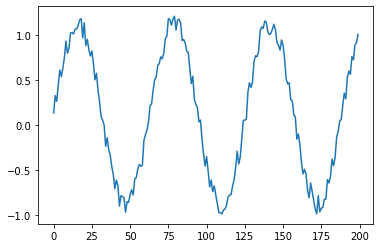

In [2]:
# create synthetic data
series = np.sin(0.1*np.arange(200)) + (0.25*np.random.random(200))

# visualize the data
plt.plot(series)
plt.show()

In [3]:
# Window
T = 10

# length of the data
n = len(series)

In [4]:
X = []
y = []

for t in range(0, n - T):
    x_t = series[t:t+T]
    y_t = series[t+T]
    X.append(x_t)
    y.append(y_t)

X = np.array(X)
y = np.array(y)

In [5]:
print(f"X.shape: {X.shape}, y.shape: {y.shape}")

X.shape: (190, 10), y.shape: (190,)


In [6]:
i = tf.keras.layers.Input(shape=(T,))
x = tf.keras.layers.Dense(1) (i)
model = tf.keras.models.Model(i, x)

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mse'
)

In [8]:
# Splitting the data in half to create train and test
# !FIX review this part of the code
half = len(X) // 2
X_train, X_test = X[:half], X[half:]
y_train, y_test = y[:half], y[half:]

In [9]:
fit_object = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_test, y_test)
) 

Epoch 1/50
3/3 [==============================] - 1s 221ms/step - loss: 0.5299 - val_loss: 0.4125
Epoch 2/50
3/3 [==============================] - 0s 25ms/step - loss: 0.2632 - val_loss: 0.0944
Epoch 3/50
3/3 [==============================] - 0s 22ms/step - loss: 0.0614 - val_loss: 0.0255
Epoch 4/50
3/3 [==============================] - 0s 25ms/step - loss: 0.0256 - val_loss: 0.0891
Epoch 5/50
3/3 [==============================] - 0s 29ms/step - loss: 0.0639 - val_loss: 0.1225
Epoch 6/50
3/3 [==============================] - 0s 26ms/step - loss: 0.0882 - val_loss: 0.0925
Epoch 7/50
3/3 [==============================] - 0s 23ms/step - loss: 0.0643 - val_loss: 0.0442
Epoch 8/50
3/3 [==============================] - 0s 21ms/step - loss: 0.0289 - val_loss: 0.0180
Epoch 9/50
3/3 [==============================] - 0s 24ms/step - loss: 0.0167 - val_loss: 0.0144
Epoch 10/50
3/3 [==============================] - 0s 24ms/step - loss: 0.0153 - val_loss: 0.0217
Epoch 11/50
3/3 [===========

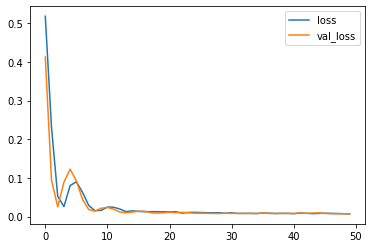

In [10]:
plt.plot(fit_object.history['loss'], label='loss')
plt.plot(fit_object.history['val_loss'], label='val_loss')
plt.legend()

In [11]:
# list to store the perdictions
y_pred = [] 
# last train input
X_pred = X_train[-1]

for i in range(len(y_test)):
    p = model.predict(X_pred.reshape(1,-1))[0,0]

    y_pred.append(p)
    X_pred = np.roll(X_pred, -1)
    X_pred[-1] = p

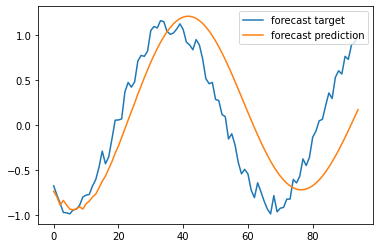

In [12]:
plt.plot(y_test, label='forecast target')
plt.plot(y_pred, label='forecast prediction')
plt.legend()

In [13]:
X_pred[-10:]

array([-0.46934643, -0.41119996, -0.34853348, -0.28188971, -0.21182039,
       -0.13892004, -0.06378755,  0.01295096,  0.09067031,  0.16873641])